# Part 1: Data Cleaning

### 1.1 Buisiness Goal:  
Model the demand for shared bikes with the available independent variables. This will help the managers to understand how exactly the demands vary with different features. They can accordingly manipulate business strategy to meet the demand levels and meet the customer's expectations. This will also highlight the demand dynamics of a new market.

### 1.2 Data Citation:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/manish/Documents/Projects/data_science/Bike_Sharing/data/raw data/day.csv'

In [3]:
day = pd.read_csv(path)

In [4]:
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


1. The data has `730` entries for each day of the year `2018` and `2019`. The data has `16` columns of which `cnt` is the `target` variable. We have to make predictions using all other variables.

2. The `instant` column does not provide any useful information as it is just another indexing column.

3. `dteday` column tells us the date of which the data is taken. This column can also be avoided as it will not provide any useful inference for the cnt variable

4. `yr` and `mnth` can be used to describe the impact of yr and month on the cnt of bike used.

5. `holiday` gives the holiday information as a binary mapping of 1:'holiday' and 0:'no_holiday'.

6. `weekday` gives the start and end of the week. Here the weekday #6 represents a monday as in the calendar.

7. `workingday` is also a binary mapping of 1: 'yes' and 2: 'no'.

8. `temp` and `atemp` gives the temperature estimates of the particular instant(day).

9. `hum` and `windspeed` gives the information of humidity and windspeed respectively.

10. `casual` and `registered`  show the count of casual and registered bike sharing users for the particular day.

11. `cnt` gives the total count of registered and non-registered users.

##### The data doesnot have any missing values, so we can start with EDA

# Part 2: EDA

In [7]:
num_cols = ['temp', 'atemp', 'hum', 
            'casual', 'registered', 'cnt', 'windspeed']

cat_cols = [col for col in day.columns if col not in 
            num_cols and col != 'dteday' and col != 'instant']

### 2.1 Univariate analysis 

#### Categorical colums

In [8]:
def catplot(data, col):
    
    sns.catplot(kind = 'count',
               x = col,
               data = data,
               palette = 'Spectral')
    
#     plt.savefig(f'Count plot of {col}', dpi = 500)
    plt.show()

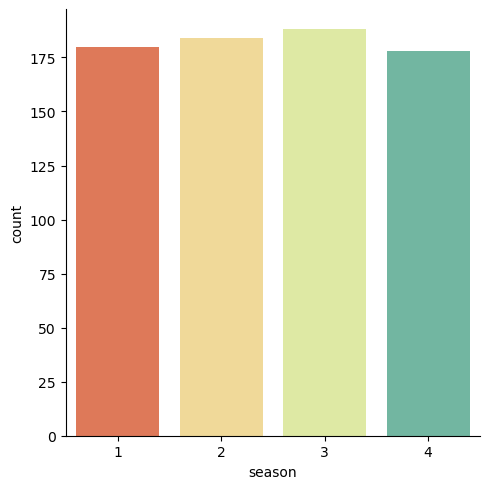

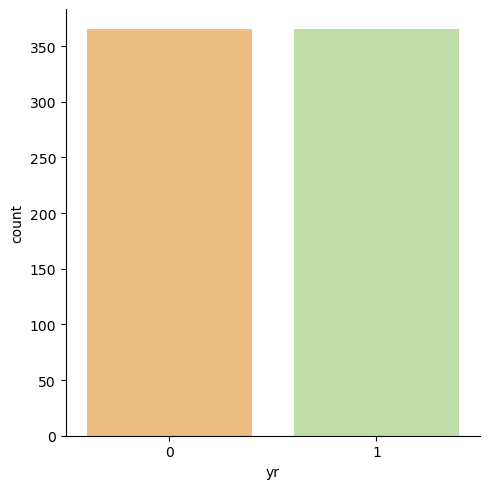

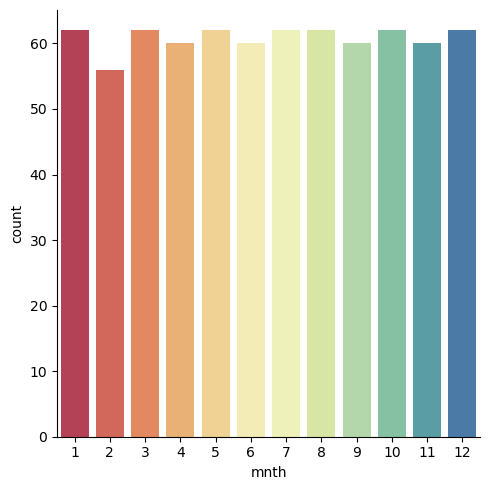

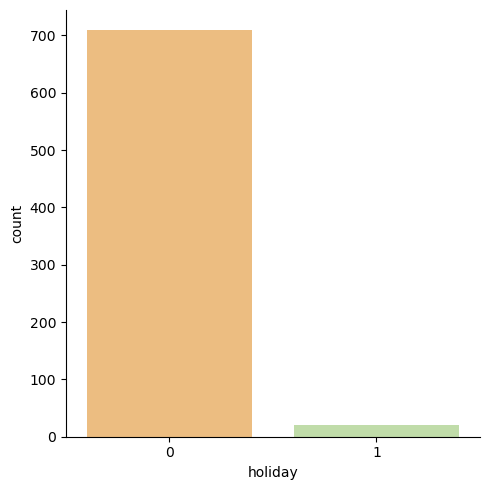

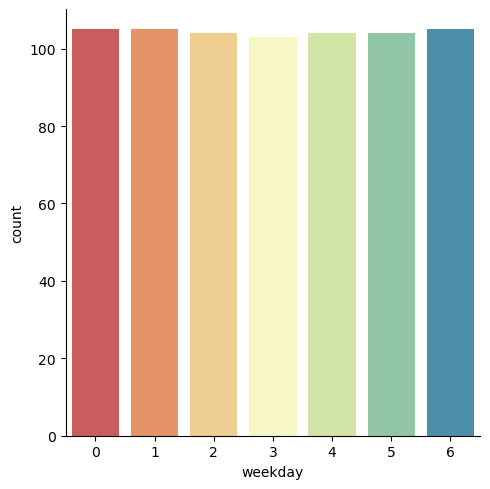

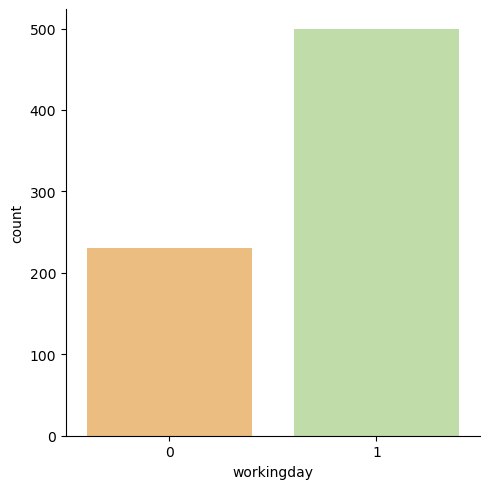

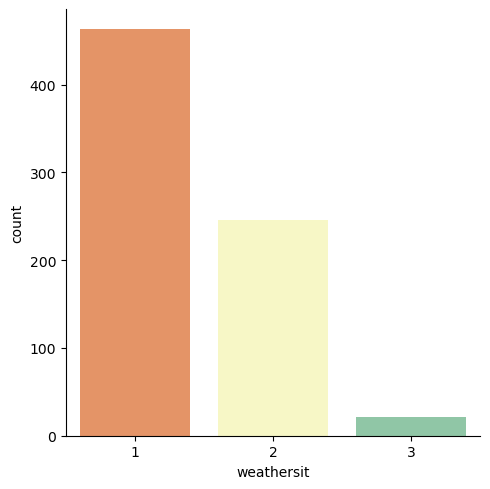

In [9]:
for i in cat_cols:
    catplot(data = day, col = i)

1. From univariate analysis of the categorical columns we find that `seasons`, `yr`, `mnth` and `weekday` are almost equally distributed.

2. More no. of `non-holdiday` days are there and also more no. of `workingday` is there.

3. `weathersit` #1. is most frequent, i.e. `clear` or `partly cloudy`, weather conditions are most frequent.



#### Numerical columns

In [10]:
def numplot(data, col):
    plt.figure(figsize = (10,5))
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], color = 'salmon')
    
    plt.subplot(1, 2, 2)
    sns.boxenplot(data[col], color = 'teal')
    plt.xlabel('Density')
    plt.ylabel(f'{col}')
    
#     plt.savefig(f'Distribution plot for {col}', dpi = 500)
    plt.show()

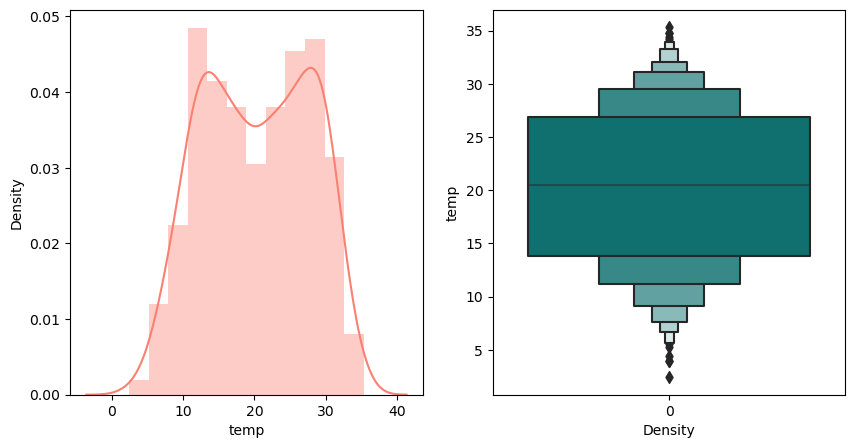

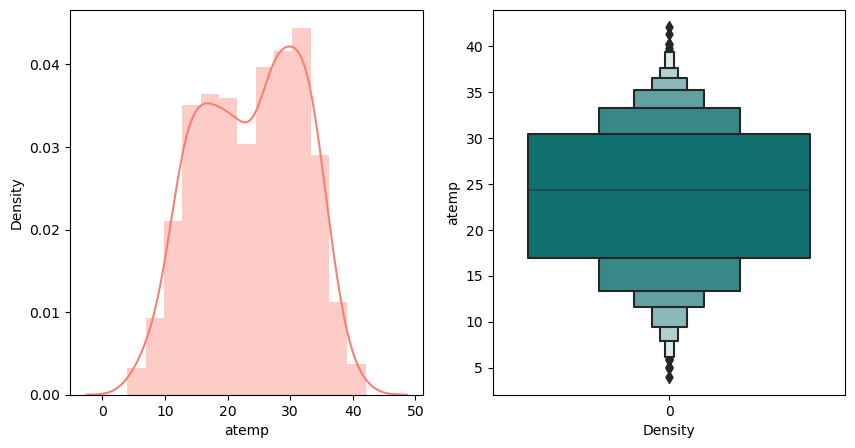

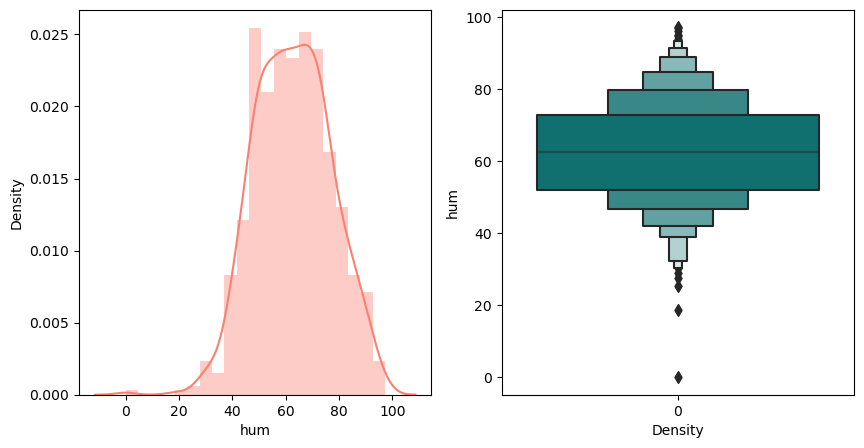

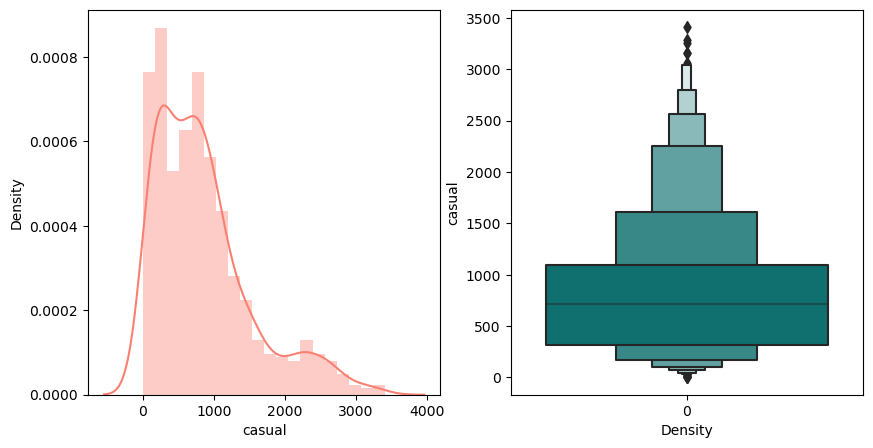

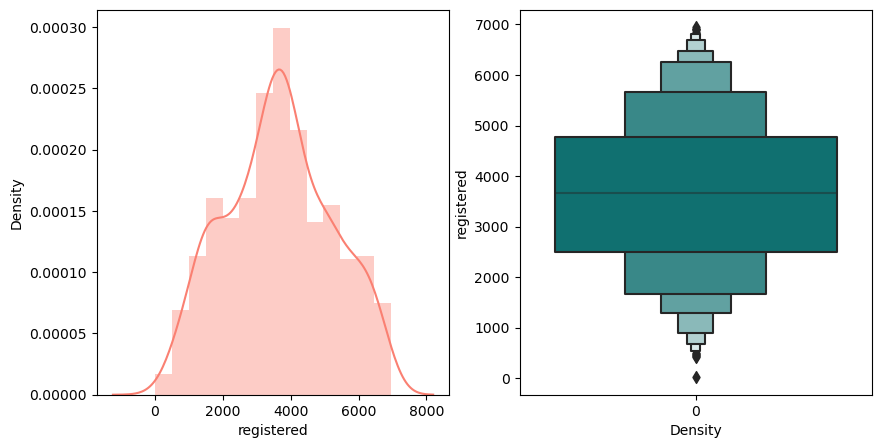

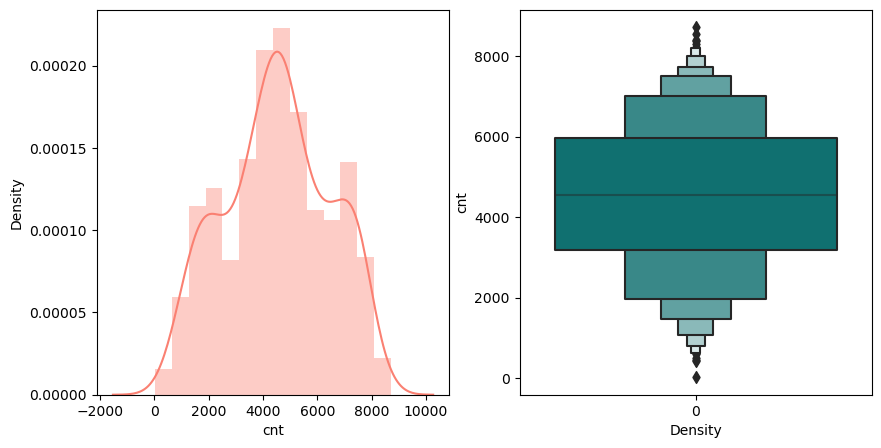

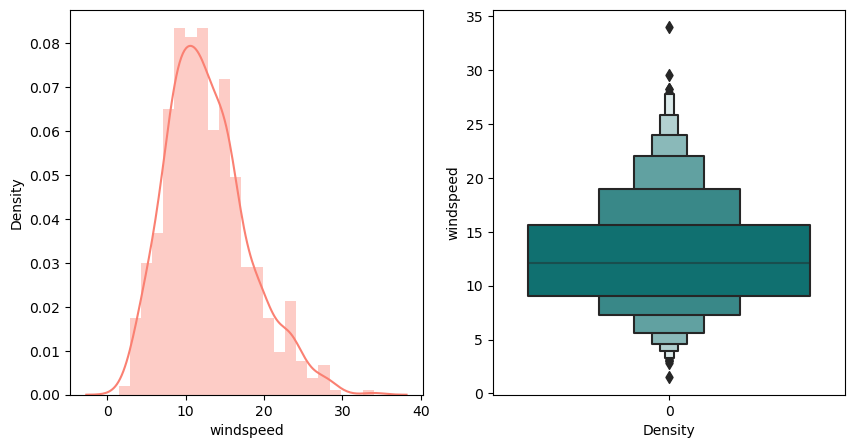

In [11]:
for i in num_cols:
    numplot(day, i)
    

1. The `atemp` column data seem to be somewhat normally distributed with two peaks @ `15` and `35` deg Celcius. Whereas the `temp` column is also similarly distributed although the two peaks are @ `10` and `30` deg Celcius. This suggests that the mean `atemp` is `5` degrees above mean `temp` in any given day. This is beacause of the `humidity`.

2. Casual or non- registered users have left skewed distribution suggesting there are about `500` to `1000` `casual riders` in any given day.

3. The `registered` users are mostly in the range of `4000` in any given and theu follow a normal distribution.

4. Total `cnt`, which is our target varibale is mostly normally distributed with some peaks on bith side of the distribution.

5. `Humidity` is right skewed suggesting mean humidity of a day is around `70%`. This also supports our temp and atemp distribution.

6. `Windspeed` is slightly left skewed suggesting mean windspeed per any given day is around `10`.

### 2.2 Bivariate Analysis

#### Numerical columns

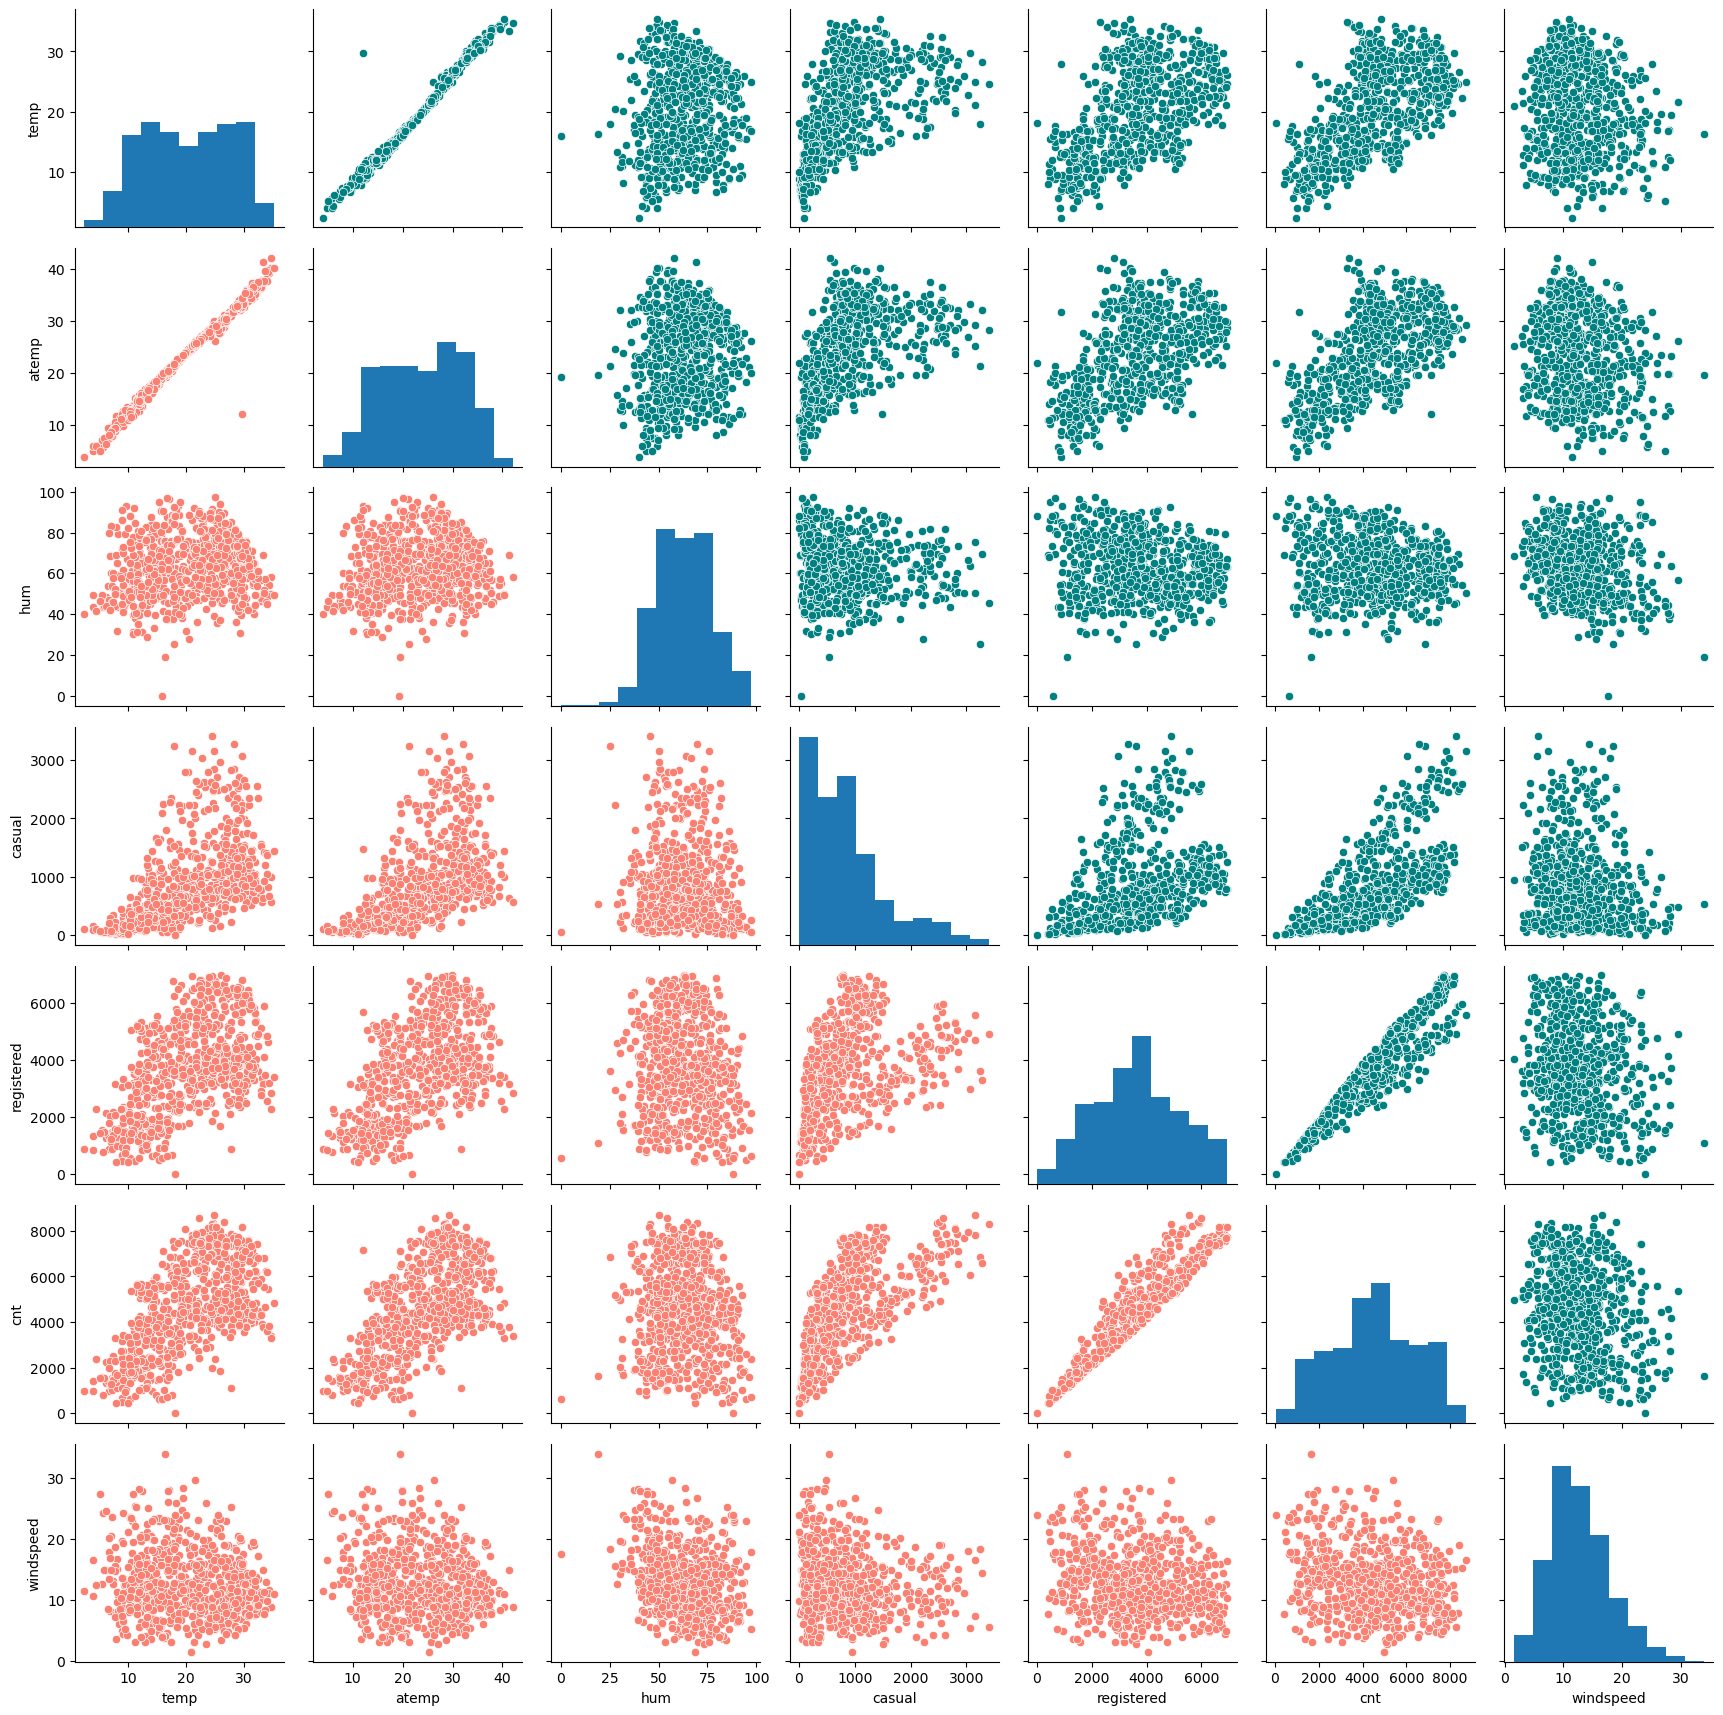

In [12]:
#looking at relationship of num cols to that of count
g = sns.PairGrid(day[num_cols])
g.map_upper(sns.scatterplot, color = 'teal')
g.map_lower(sns.scatterplot, color = 'salmon')
g.map_diag(plt.hist)
# plt.savefig('Target vs Numerical data', dpi = 500)
plt.show()

1. From the pair plot we can see `temp`, `atemp`, `registered` and `casual` has some linear relationship with `cnt.

2. `temp` and `atemp` are linearly dependent with each other so we have to choose one for model building to avoid multicollinearity issues.

3. `hum` does not show any linear relationship with `cnt`.

4. `temp`, `atemp`, `registered` and `casual` have somewhat of a normal distribution. Whereas `casual` is left skewed. Also `hum` is somewhat normal with shorter tails.

#### Categorical columns

In [13]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

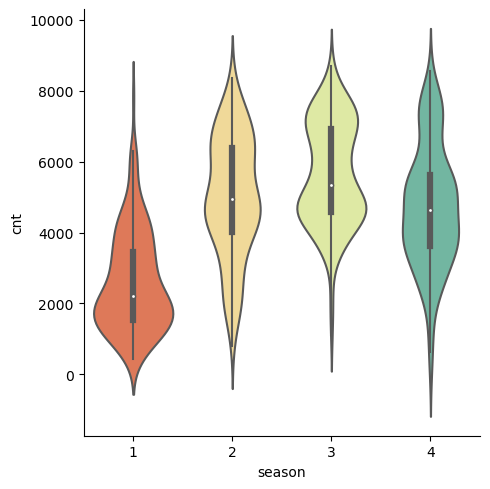

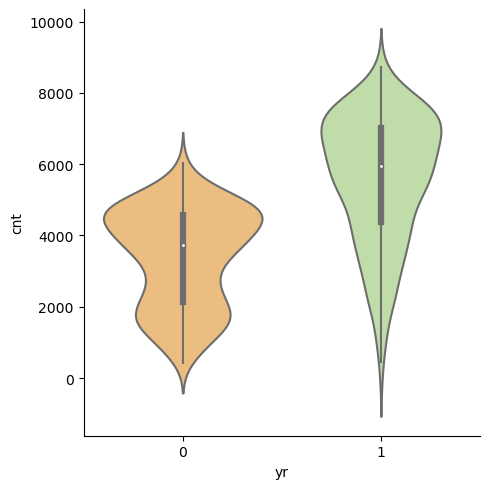

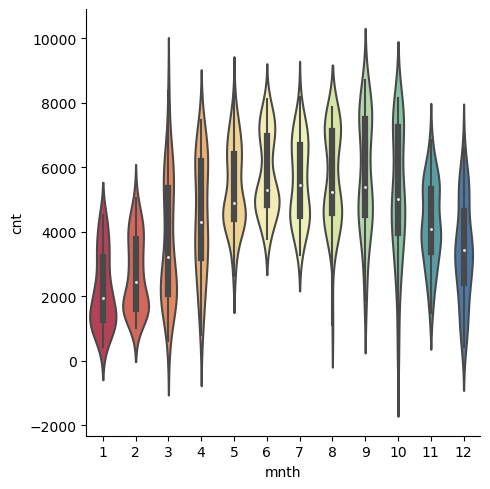

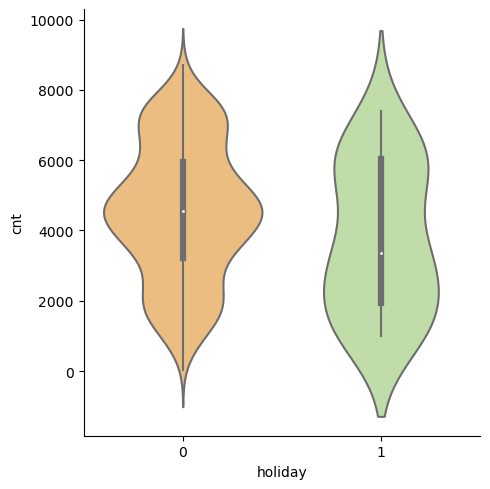

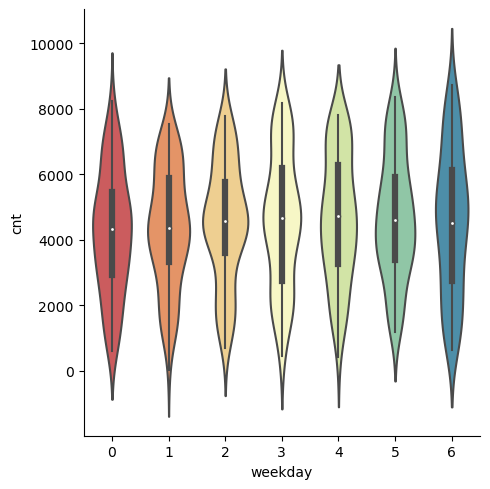

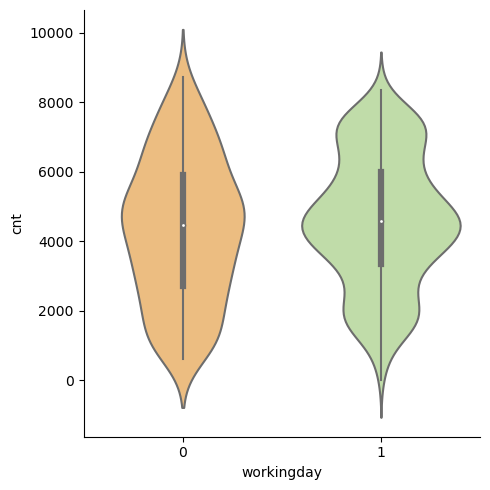

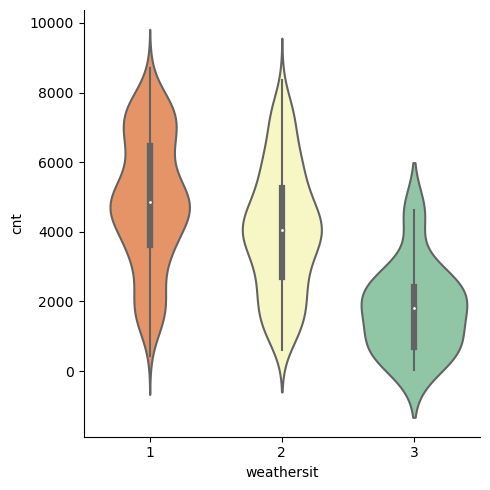

In [80]:
for i in cat_cols:
    sns.catplot(data = day,
                kind = 'violin',
                x = i,
                y = 'cnt',
                palette = 'Spectral')
#     plt.savefig(f'Distribution of bike counts vs {i}', dpi = 500)
    plt.show()

#### Plotting `cnt` with various categorical columns we find that:

1. Seson has some visible impact on the bike counts. With season `3` having the highest median count followed by season `2`, `4` and `1`.

2. The year `2019` has higher median bike counts than year `2018`.

3. Similar to seasons the months have a similar distribution of bike counts. With highest being the month of `june`, `july` followed by fall months and leasr is observed in the months of `jan` and `feb`.

4. Non holiday days have higher median count than holidays

5. All weekdays have similar distribution with day `3` and `4` have slightly higher median counts.

6. Working day and non working day have similar median counts with working day having higher concentration near median, whereas non-working day have smoother peaks and elongated tails.

7. Weathersit `1` are more favourable for bike counts than `2` and `3`, with `3` being list favourable.

### 2.3 Multivariate Analysis

#### Bike count for different years and different categories

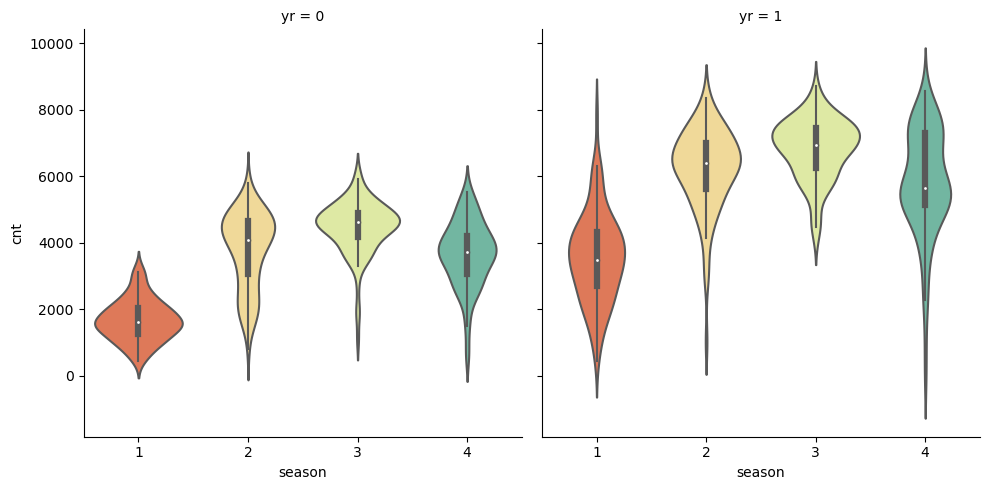

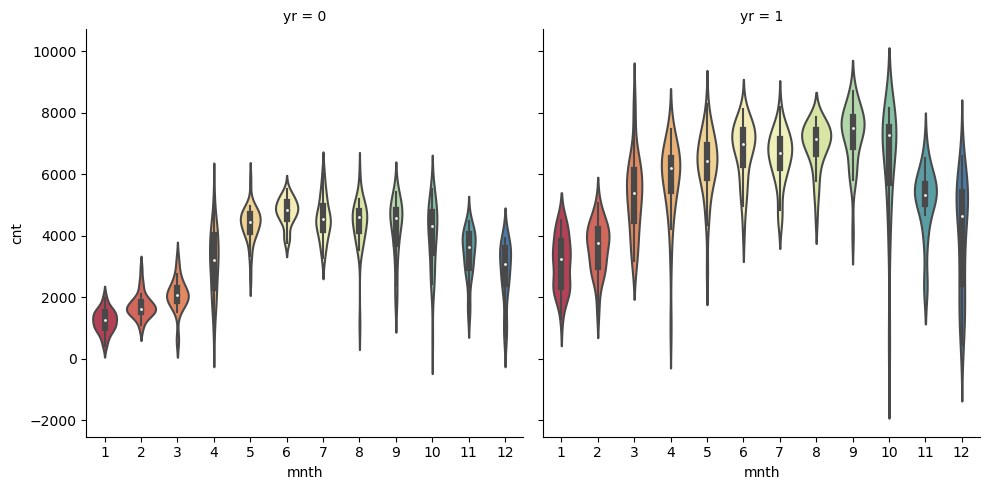

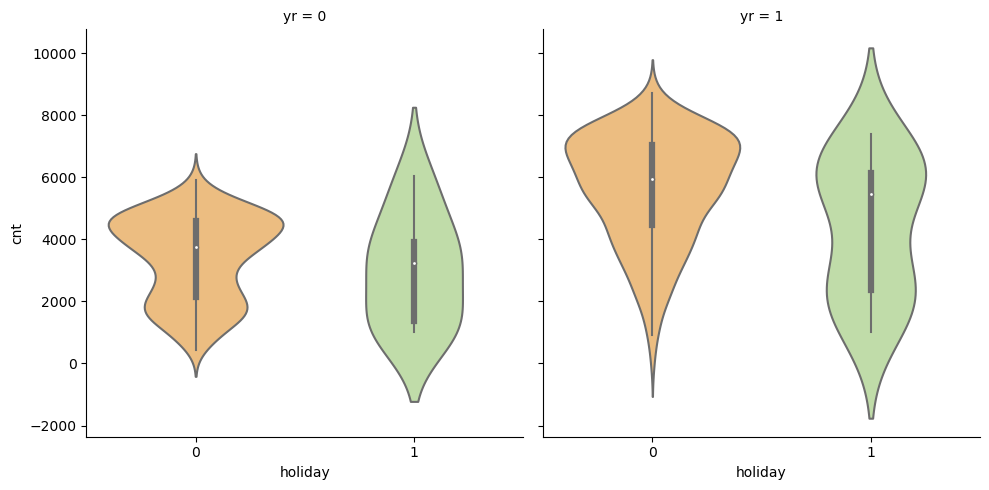

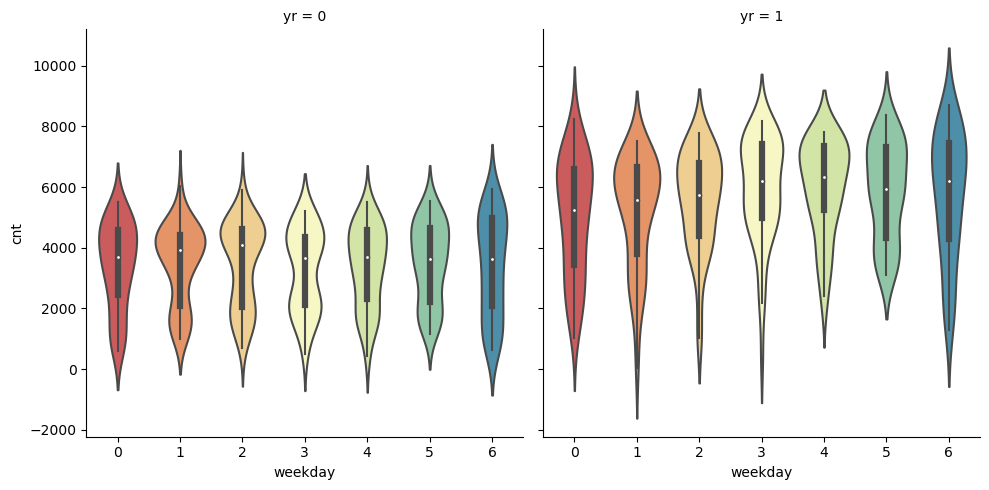

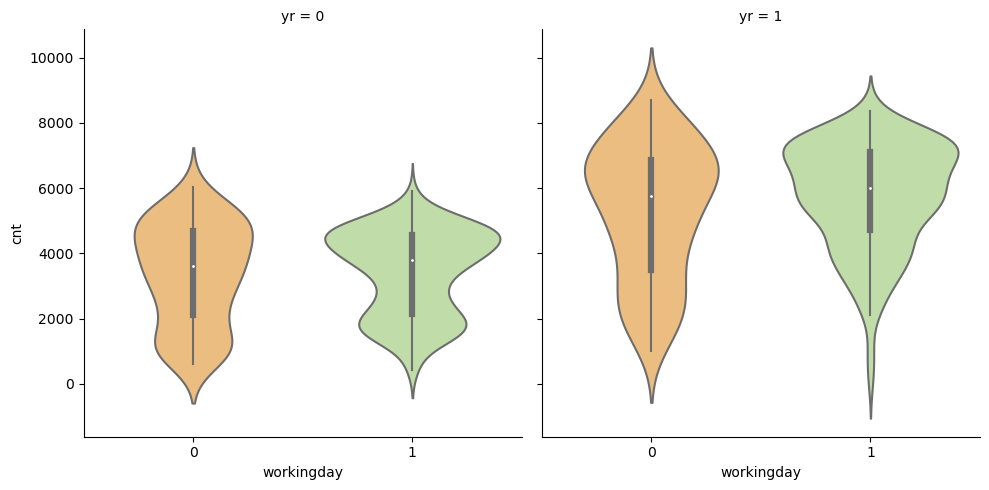

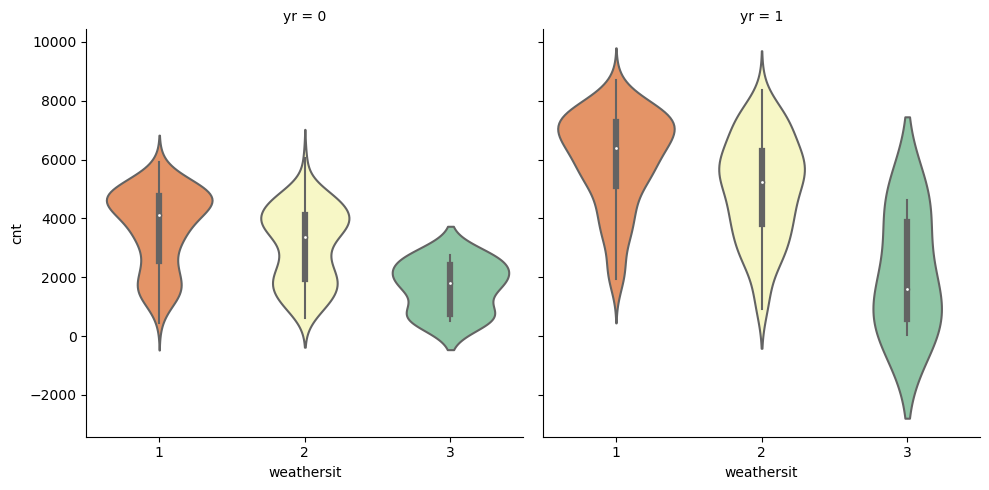

In [15]:
for i in cat_cols:
    if i != 'yr':
        sns.catplot(kind = 'violin',
                    data = day,
                    x = i,
                    y = 'cnt',
                    col = 'yr',
                    palette = 'Spectral' )
#         plt.savefig('Distribution of bike counts on various {} for both years'.format(i), dpi = 500)
        plt.show()

#### Plotting bike cnt for various categories for different years we find.

1. Season has similar distribution in both years for each seasons but higher median bike counts are found for year `2019`. Also we see slightly elongated tails in individual seasons fro the year 2019.

2. Months like season show similar distribution, have similar elongated tails for the yera 2019.

3. Non holidays have slightly higher median counts for the years. But we see it is higher for the year 2019.

4. In `2018` the highest median count is for the day `2` and slid down for the days after  `2` and also before 2. Whereas for the year `2019` the highest median count is for day `3` and day `6`. Also median count for year 2019 is higher than 2018.

5. Working day and non working day have similar median count and is slightly more for the year 2019 than the year 2018.

6. Weathersit `1` are most favourable in both years but the difference in count is more observable between weather sit `1` and `3` for the year 2019 than `2018`.

From the above analysis we see that- `Mnth` and `season` show similar impact and they can create `multicollinearity`.  So are `temp` and `atemp`. `Weathersit`,` year` and `season` have visible `impact` on bike `count`. It seems because of increse in popularity the bike count incresed in the year 2019 than 2018. This can show the improvement in business for the company but doesnot show prediction for the bike count in a given day. So yr cannot be a predictor variable for bike count. Also we can drop the instant and dteday columns as they will not have any impact on the prediction of cnt.

# Part 3: Model Building

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

### 3.1 MODEL PREPARATION

 Dropping registered and casual user columns as they are redundant to the target variable, also dropping dteday and instant column as they are unnecessay for predictions

In [17]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [18]:
df = day.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 3.1.1 Creating dummies for categorical columns

In [19]:
df_season = pd.get_dummies(df.season).rename({1 : 'spring', 2 : 'summer',
                                              3 : 'fall', 4 :  'winter'}, axis = 1).drop(['spring'], axis =1)


df_mnth = pd.get_dummies(df.mnth).rename({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr',
                                            5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug',
                                            9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'},
                                           axis = 1).drop(['Jan'], axis =1)


df_weekday = pd.get_dummies(df.weekday).rename({0 : 'Tue', 1 : 'Wed', 2: 'Thu', 3: 'Fri',
                                                4 : 'Sat', 5 : 'Sun', 6 : 'Mon'}, 
                                              axis = 1).drop(['Tue'], axis = 1)


df_weather = pd.get_dummies(df.weathersit).rename({1 : 'Clear', 2 : 'Clody_misty',
                                              3 : 'Rainy_snow'}, axis = 1).drop(['Clear'], axis =1)

##### Dropping the redundant columns

In [20]:
df = pd.concat([df, df_season, df_mnth, df_weekday, df_weather], axis = 1).drop(['season',
                                                                'mnth', 'weekday', 'weathersit'],
                                                               axis = 1)

In [21]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Wed,Thu,Fri,Sat,Sun,Mon,Clody_misty,Rainy_snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


### 3.1.2 Train test split

In [22]:
df_train, df_test = train_test_split(df, test_size = 0.3,
                                     random_state = 42)

In [23]:
print(df_train.shape, df_test.shape)

(511, 30) (219, 30)


### 3.1.3 Rescalling

In [24]:
num_cols.remove('casual')
num_cols.remove('registered')
num_cols

['temp', 'atemp', 'hum', 'cnt', 'windspeed']

In [25]:
df_train[num_cols].describe()

,temp,atemp,hum,cnt,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000
mean,20.550310,24.009242,63.482145,4552.951076,12.598001
std,7.476797,8.112525,13.939855,1938.435496,4.965253
min,2.424346,3.953480,0.000000,431.000000,1.500244
25%,14.079626,17.407600,52.848700,3288.500000,9.041918
50%,21.354153,25.410200,64.041700,4590.000000,11.791732
75%,26.940424,30.556050,73.458300,6037.500000,15.583497
max,35.328347,42.044800,97.041700,8714.000000,28.250014


In [26]:
# rescalling numerical columns
scaler = MinMaxScaler()

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [27]:
df_train[num_cols].describe()

,temp,atemp,hum,cnt,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.550874,0.526518,0.654174,0.497640,0.414873
std,0.227231,0.212976,0.143648,0.234026,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354221,0.353207,0.544598,0.344984,0.281934
50%,0.575304,0.563297,0.659940,0.502113,0.384732
75%,0.745079,0.698389,0.756977,0.676868,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.1.4 Creating X and y

In [28]:
X_train, y_train = df_train.drop(['cnt'], axis = 1), df_train['cnt']

In [29]:
X_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,Nov,Dec,Wed,Thu,Fri,Sat,Sun,Mon,Clody_misty,Rainy_snow
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,1,0,0,0,0,1,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
y_train.head(3)

683    0.605336
645    0.609320
163    0.554026
Name: cnt, dtype: float64

Our model preparation is done. Let us check the correlation of various independent variables and the dependent variable.

### 3.1.5 Correlation coefficients

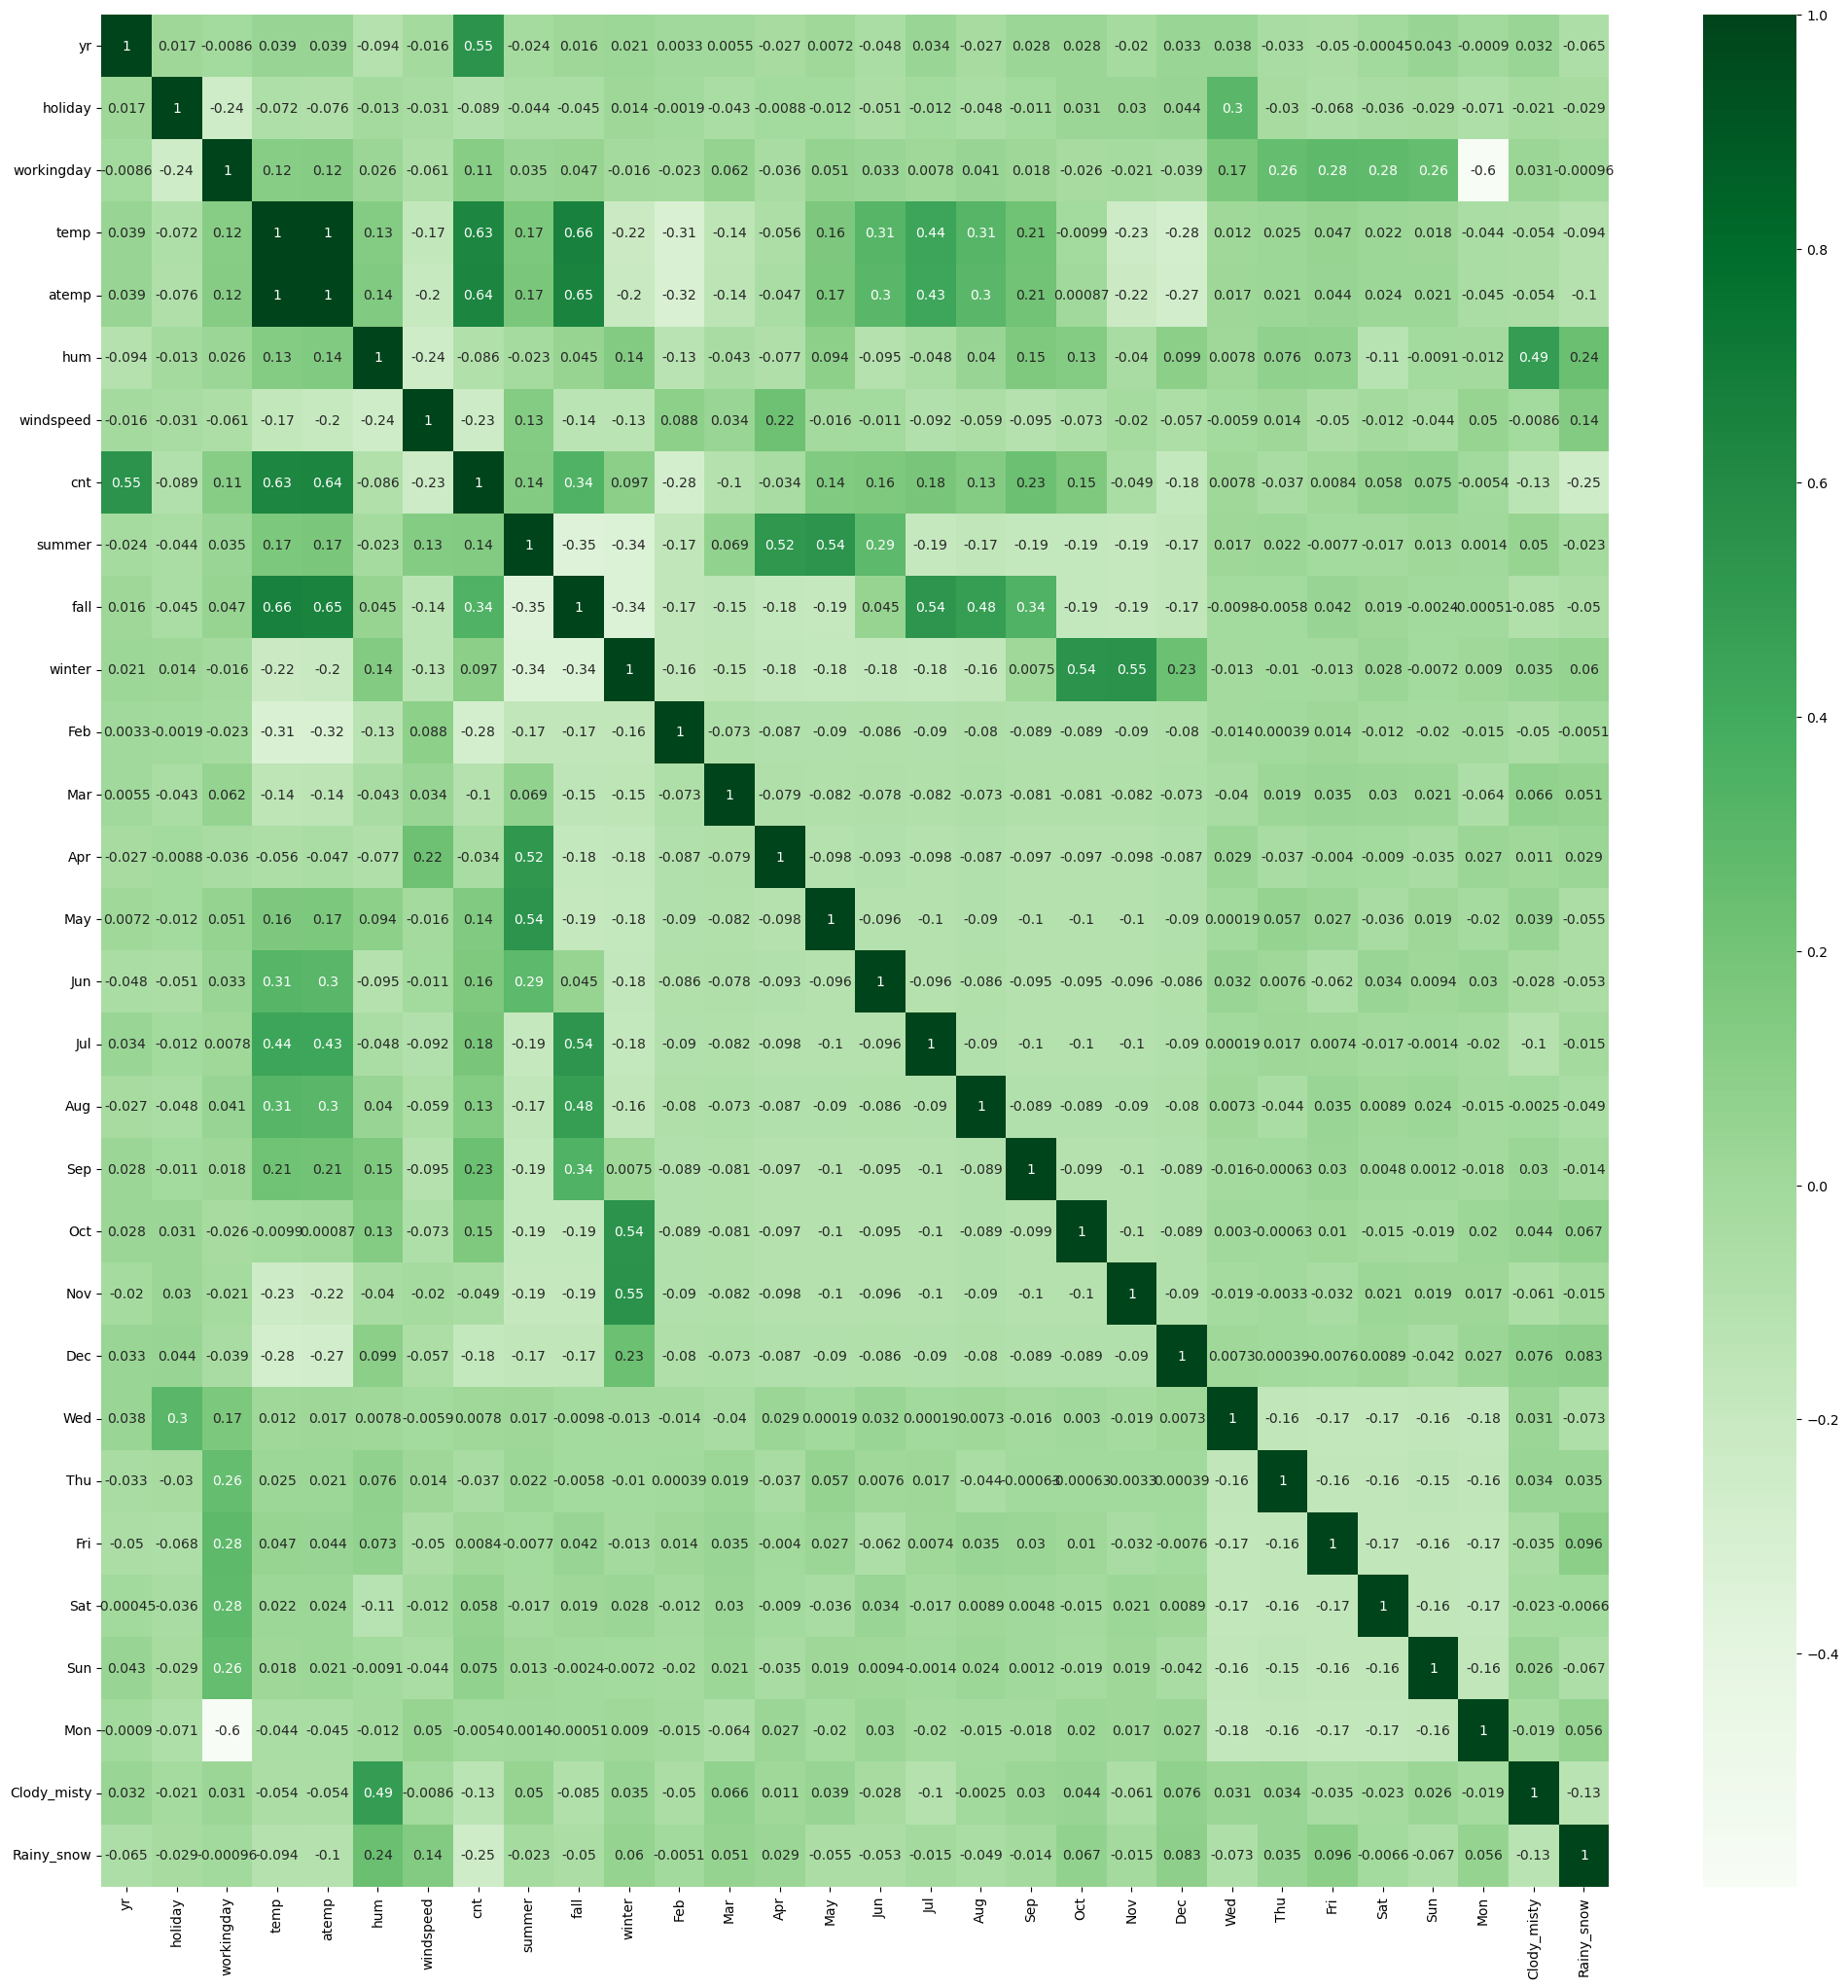

In [ ]:
corr = df_train.corr()

plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True, cmap = 'Greens')
# plt.savefig('Heatmap', dpi = 500)
plt.show()

In [ ]:
var = corr.cnt.sort_values()
var

Feb           -0.276055
Rainy_snow    -0.251473
windspeed     -0.230813
Dec           -0.184061
Clody_misty   -0.132772
Mar           -0.099966
holiday       -0.089413
hum           -0.085989
Nov           -0.049265
Thu           -0.037364
Apr           -0.034499
Mon           -0.005450
Wed            0.007772
Fri            0.008433
Sat            0.057851
Sun            0.074594
winter         0.096844
workingday     0.113021
Aug            0.129193
summer         0.136621
May            0.139039
Oct            0.150842
Jun            0.155856
Jul            0.181658
Sep            0.233812
fall           0.341052
yr             0.547241
temp           0.633855
atemp          0.641561
cnt            1.000000
Name: cnt, dtype: float64

We can see that `Feb`,  `weathersit`, `windspeed` have high `negative` correlation and `atemp`, `temp` and `yr` have high `positive` correlation with `cnt`.


### 3.2 MODEL BUILDING

### 3.2.1 Creating a sorted variable list

In [33]:
var = pd.DataFrame(data = var)
var['abs_values'] = var.apply(lambda x : abs(x))
var

,cnt,abs_values
Feb,-0.276055,0.276055
Rainy_snow,-0.251473,0.251473
windspeed,-0.230813,0.230813
Dec,-0.184061,0.184061
Clody_misty,-0.132772,0.132772
Mar,-0.099966,0.099966
holiday,-0.089413,0.089413
hum,-0.085989,0.085989
Nov,-0.049265,0.049265
Thu,-0.037364,0.037364


In [34]:
var = list(var['abs_values'].sort_values(ascending = False).index)
var

['cnt',
 'atemp',
 'temp',
 'yr',
 'fall',
 'Feb',
 'Rainy_snow',
 'Sep',
 'windspeed',
 'Dec',
 'Jul',
 'Jun',
 'Oct',
 'May',
 'summer',
 'Clody_misty',
 'Aug',
 'workingday',
 'Mar',
 'winter',
 'holiday',
 'hum',
 'Sun',
 'Sat',
 'Nov',
 'Thu',
 'Apr',
 'Fri',
 'Wed',
 'Mon']

In [35]:
var.remove('cnt')

### 3.2.2 Functions for building linear model

In [36]:
# Building a linear model
def build_linear_model(X, y):
    
    model = sm.OLS(y, sm.add_constant(X))
    model = model.fit()
#     print(model.rsquared_adj)
    
    return model

# Checking VIF scores for independent variables
def get_vif(X_train):
    vif_df = pd.DataFrame()

    vif_df['Features'] = X_train.columns
    vif_df['VIF'] = [variance_inflation_factor(X_train.values, i)
                 for i in range(X_train.shape[1])]

    vif_df = vif_df.sort_values(by = 'VIF', ascending = False)
    return vif_df

### 3.2.3 Linear models

#### Model 0

In [37]:
model0 = build_linear_model(X_train, y_train)

In [38]:
print(model0.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.839    
Dependent Variable: cnt              AIC:                -939.6809
Date:               2023-05-24 09:32 BIC:                -816.8262
No. Observations:   511              Log-Likelihood:     498.84   
Df Model:           28               F-statistic:        96.02    
Df Residuals:       482              Prob (F-statistic): 1.78e-177
R-squared:          0.848            Scale:              0.0088101
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.1385    0.0342   4.0529  0.0001   0.0714   0.2057
yr              0.2358    0.0086  27.5672  0.0000   0.2190   0.2526
holiday        -0.0365    0.0242  -1.5083  0.1321  -0.0839   0.0110
workingday      0.0386    0.0097   3.9760  0.0001   0.0195   0.0577
temp  

In [39]:
print(model0.rsquared_adj)

0.8391386415907516


This shows that taking all the coloumsn together we get aa adjusted r2 `0.839`. But we severe multicollinearity issues. As a lot of variables have very high `p-value`

We need to eliminate feature and we can do this using recurssive feature elimination.

#### Cheking the adjusted R2 vs features

Creating a list of list of variables, increasing the list by one variable.

In [40]:
var_list = []
for i in range(1,len(var) + 1):
    k = var[ : i]
    var_list.append(k)

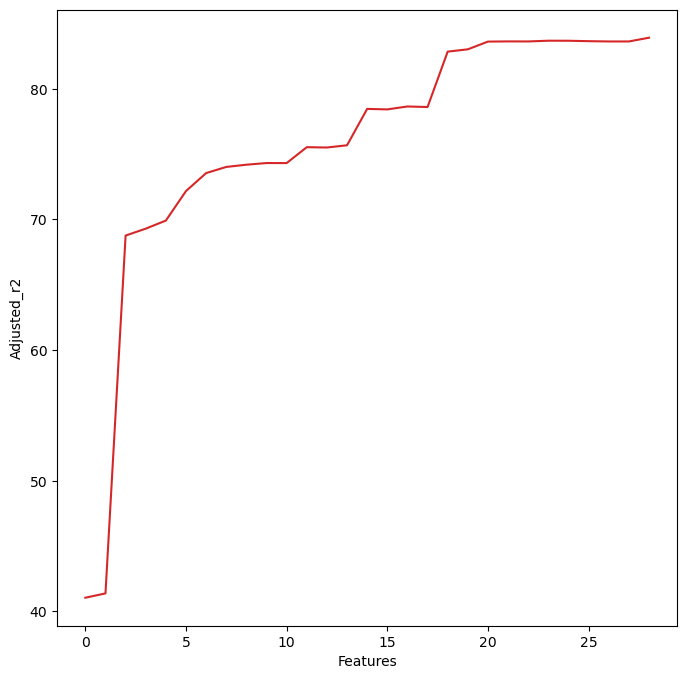

In [41]:
Adj_r2 = []
for i in var_list:
    model = build_linear_model(X_train[i], y_train)
    k = round(100 * (model.rsquared_adj), 3)
    Adj_r2.append(k)
    
plt.figure(figsize = (8,8))
plt.plot(Adj_r2, color = 'C3')
plt.xlabel('Features')
plt.ylabel('Adjusted_r2')
# plt.savefig('Adjusted_r2 vs features', dpi = 500)
plt.show()

We find that the adjusted r2 increases to `70%` with just 2 variables, but as we increase the no. of variables the increase in adr_r2 score increses very slowly and flattens first at 15 features @ `80%`. Then agin it increases to `85%` with addition of two more variables and flattens at `85%` even with increase invariables.

This suggests that no improvement in accuracy will occur with features more than `17`. So we check for the top `15` features using `RFE`.

### 3.2.4 Feature Elimination

In [42]:
get_vif(X_train)

,Features,VIF
24,Sat,inf
1,holiday,inf
2,workingday,inf
23,Fri,inf
22,Thu,inf
21,Wed,inf
25,Sun,inf
3,temp,1500.216045
4,atemp,1431.000837
5,hum,21.448772


we see a lot of columns with high VIF and high p-values, we can eliminate them one by one or use, RFE to eliminate the ones we want.

####  Checking RFE scores

In [43]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [44]:
rfe = RFE(estimator = lr,
          n_features_to_select = 15)

In [45]:
rfe = rfe.fit(X_train, y_train)

In [46]:
RFE_ = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)),
                    columns = ['Features', 'Support', 'Ranking'])
RFE_

,Features,Support,Ranking
0,yr,True,1
1,holiday,True,1
2,workingday,True,1
3,temp,False,6
4,atemp,True,1
5,hum,True,1
6,windspeed,True,1
7,summer,True,1
8,fall,True,1
9,winter,True,1


##### Eliminating features not supported by RFE

In [47]:
sup = X_train.columns[rfe.support_]
rej = X_train.columns[~rfe.support_]

In [48]:
X_train = X_train[sup]

#### Model 1

In [49]:
Model1 = build_linear_model(X_train, y_train)

In [50]:
print(Model1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.808    
Dependent Variable: cnt              AIC:                -861.9397
Date:               2023-05-24 09:32 BIC:                -798.3942
No. Observations:   511              Log-Likelihood:     445.97   
Df Model:           14               F-statistic:        154.0    
Df Residuals:       496              Prob (F-statistic): 2.60e-170
R-squared:          0.813            Scale:              0.010530 
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.1903    0.0316   6.0203  0.0000   0.1282   0.2524
yr              0.2339    0.0092  25.4620  0.0000   0.2159   0.2520
holiday        -0.0506    0.0254  -1.9967  0.0464  -0.1004  -0.0008
workingday      0.0213    0.0087   2.4418  0.0150   0.0042   0.0384
atemp 

In [51]:
get_vif(X_train)

,Features,VIF
1,holiday,inf
2,workingday,inf
9,Wed,inf
10,Thu,inf
11,Fri,inf
12,Sat,inf
13,Sun,inf
3,atemp,22.072258
4,hum,12.007362
7,fall,6.373273


We have to eliminate `Thu`, `Fri`, `Sat`, `Sun` and check again for vif and p-values in next Model

#### Model 2

In [52]:
X_train = X_train.drop(['Thu', 'Fri', 'Sat', 'Sun'], axis = 1)

In [53]:
Model2 = build_linear_model(X_train, y_train)
print(Model2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.808    
Dependent Variable: cnt              AIC:                -865.2096
Date:               2023-05-24 09:32 BIC:                -814.3731
No. Observations:   511              Log-Likelihood:     444.60   
Df Model:           11               F-statistic:        196.0    
Df Residuals:       499              Prob (F-statistic): 3.77e-173
R-squared:          0.812            Scale:              0.010522 
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.1931    0.0314   6.1439  0.0000   0.1314   0.2549
yr              0.2342    0.0092  25.5446  0.0000   0.2162   0.2523
holiday        -0.0545    0.0308  -1.7707  0.0772  -0.1149   0.0060
workingday      0.0181    0.0104   1.7508  0.0806  -0.0022   0.0385
atemp 

In [54]:
get_vif(X_train)

,Features,VIF
3,atemp,22.051805
4,hum,11.882666
7,fall,6.371831
5,windspeed,4.477180
6,summer,3.937947
2,workingday,3.339942
8,winter,2.684300
0,yr,2.038683
9,Wed,1.390522
1,holiday,1.240014


We still have `workingday`, `holiday` and `Wed` with high p-values, we drop these in the next model

#### Model 3

In [55]:
X_train = X_train.drop(['workingday', 'holiday', 'Wed'], axis = 1)

In [56]:
Model3 = build_linear_model(X_train, y_train)
print(Model3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.805    
Dependent Variable: cnt              AIC:                -860.4335
Date:               2023-05-24 09:32 BIC:                -822.3062
No. Observations:   511              Log-Likelihood:     439.22   
Df Model:           8                F-statistic:        264.1    
Df Residuals:       502              Prob (F-statistic): 1.81e-174
R-squared:          0.808            Scale:              0.010682 
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.1987    0.0309   6.4240  0.0000   0.1379   0.2594
yr              0.2334    0.0092  25.2792  0.0000   0.2152   0.2515
atemp           0.5450    0.0394  13.8308  0.0000   0.4676   0.6224
hum            -0.2586    0.0350  -7.3954  0.0000  -0.3273  -0.1899
windsp

In [57]:
get_vif(X_train)

,Features,VIF
1,atemp,21.476284
2,hum,11.274820
5,fall,6.323740
3,windspeed,4.439322
4,summer,3.919168
6,winter,2.679993
0,yr,2.033307
7,Rainy_snow,1.117500


Model 3 has statistically significant independent variables, but we still have some multicollinearity issue with hum and atemp. We eliminate these features, but since the coefficients are high for them, they seem to increase the accuracy of the model.

We can choose fall and windsprred which have higher VIF and lower coefficient values or we can keep this model.
Lets check for the accuracy and VIF score by eliminating these two features

#### Model 4

In [58]:
Model4 = build_linear_model(X_train.drop(['fall'], axis = 1), y_train)
print(Model4.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.795    
Dependent Variable: cnt              AIC:                -835.7236
Date:               2023-05-24 09:32 BIC:                -801.8326
No. Observations:   511              Log-Likelihood:     425.86   
Df Model:           7                F-statistic:        283.4    
Df Residuals:       503              Prob (F-statistic): 4.97e-170
R-squared:          0.798            Scale:              0.011233 
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.1756    0.0314   5.5966  0.0000   0.1140   0.2373
yr              0.2317    0.0095  24.4926  0.0000   0.2131   0.2503
atemp           0.7107    0.0237  30.0101  0.0000   0.6641   0.7572
hum            -0.2641    0.0358  -7.3691  0.0000  -0.3345  -0.1937
windsp

In [59]:
get_vif(X_train.drop(['fall'], axis = 1))

,Features,VIF
2,hum,10.759696
1,atemp,7.196825
3,windspeed,4.414421
0,yr,2.024538
5,winter,1.579569
4,summer,1.571116
6,Rainy_snow,1.107321


Dropping the fall column results in slight decrease of accuracy from adj_r2 score of `80.5%` in Model3 to `79.5%` in Model4 but this significantly reduces the VIF for hum and atemp from `21`, `11` to `10`, `7` respectively for Model3 and Model4.

This seems to be managable and we can stop from further feature elimination. But if we eliminate the windspeed we can further reduce the VIFs

#### Model 5

In [60]:
Model5 = build_linear_model(X_train.drop(['fall', 'windspeed'], axis = 1), y_train)
print(Model5.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.787    
Dependent Variable: cnt              AIC:                -816.5378
Date:               2023-05-24 09:32 BIC:                -786.8832
No. Observations:   511              Log-Likelihood:     415.27   
Df Model:           6                F-statistic:        314.4    
Df Residuals:       504              Prob (F-statistic): 8.82e-167
R-squared:          0.789            Scale:              0.011686 
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.0868    0.0253   3.4337  0.0006   0.0371   0.1365
yr              0.2324    0.0096  24.0885  0.0000   0.2135   0.2514
atemp           0.7311    0.0237  30.8156  0.0000   0.6845   0.7777
hum            -0.2240    0.0355  -6.3172  0.0000  -0.2937  -0.1544
summer

In [61]:
get_vif(X_train.drop(['fall', 'windspeed'], axis = 1))

,Features,VIF
2,hum,8.559976
1,atemp,7.185057
0,yr,1.980188
4,winter,1.578388
3,summer,1.529361
5,Rainy_snow,1.100442


We can use this model as the VIfs have come below 10 also the accuracy has not reduced that significantly, But the p value of the intercept has slightly increased but it is still statistically significant.

So this model can be used for getting bike count using multiple linear regression model with RFE for feature elimination and VIF for tackling multicollinearity.

Thus the final model can be written as:

y = 0.0868 + (.2324 * yr) +  (.7311 * atemp) + (-0.224 * hum) + (0.0675 * summer) + (0.1572 * winter) + (-0.1827 * Rainy/snow)

#### Saving X_train

In [62]:
X_train = X_train.drop(['fall', 'windspeed'], axis = 1)

#### Saving Models

In [63]:
models = [model0, Model1, Model2,
          Model3, Model4, Model5]

# for model in range(len(models)):
#     fname = f'Model{model}'
#     pickle.dump(fname, open(fname, 'wb'))

Now we can proceed to residual analysis and model training prediction and then to model evaluation

### 3.3 RESIDUAL ANALYSIS

In [64]:
def residual_analysis(X_train, y_train, model):
    
        
    y_train_pred = model.predict(sm.add_constant(X_train))

    
    res = y_train - y_train_pred
    
    for i in X_train.columns:
    
        plt.figure(figsize = (10, 5))    
        plt.subplot(1, 2, 1)
        sns.distplot(x = res, color = 'C3')
    
        plt.subplot(1, 2, 2)
        sns.scatterplot(x = X_train[i], y = res, color = 'C2')
    

#         plt.savefig(f'Residual analysis for {i}', dpi = 500)

        plt.show() 

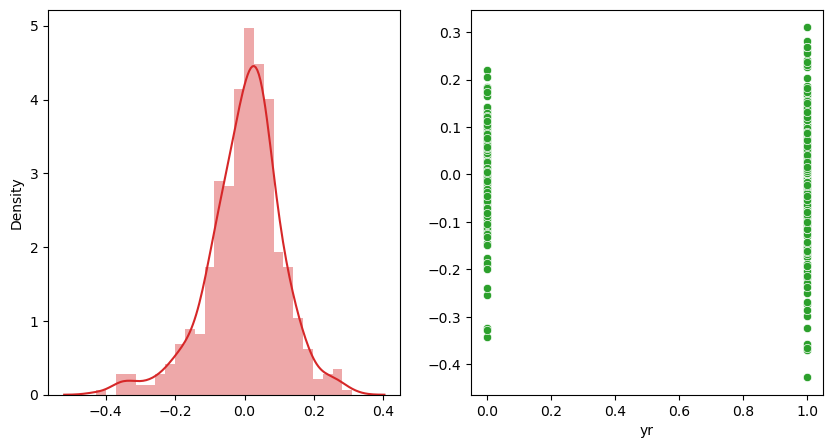

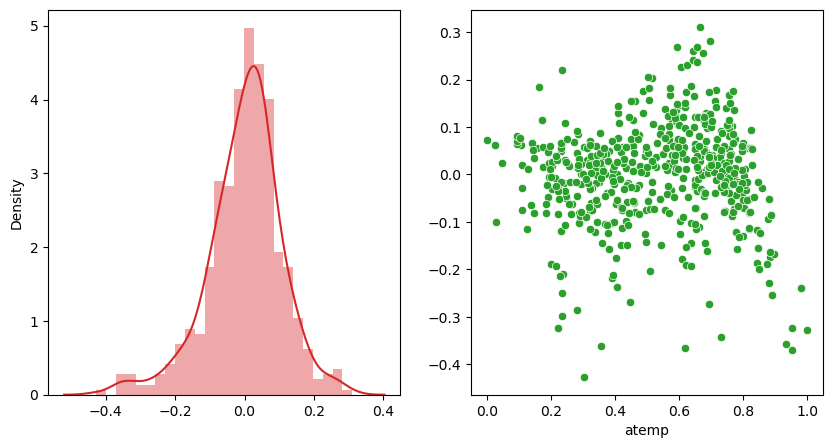

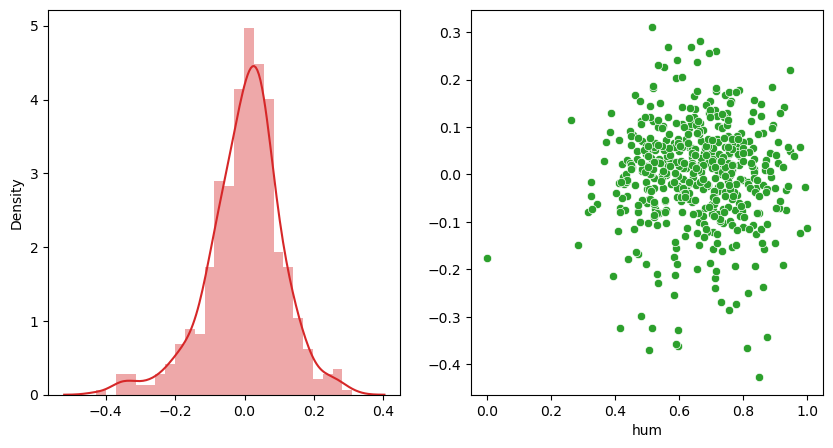

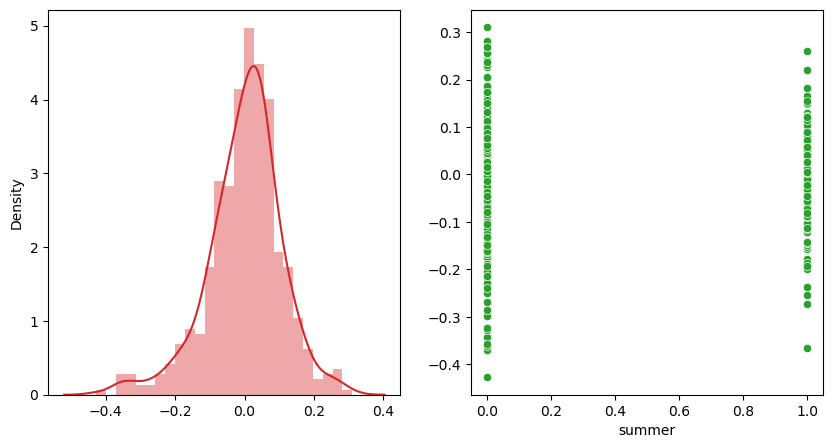

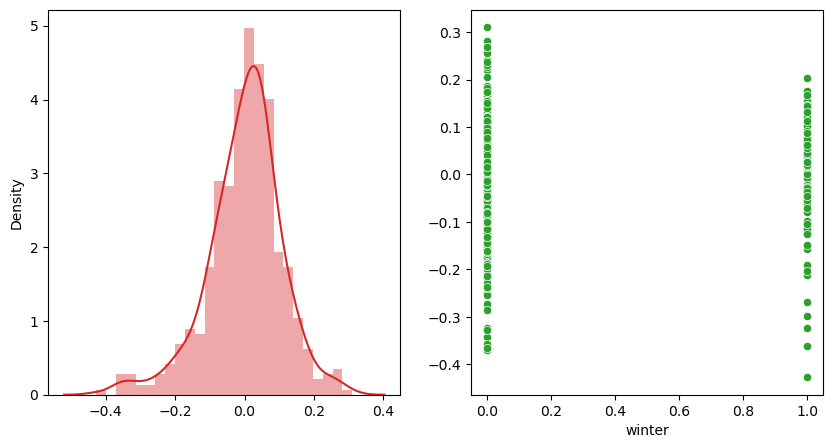

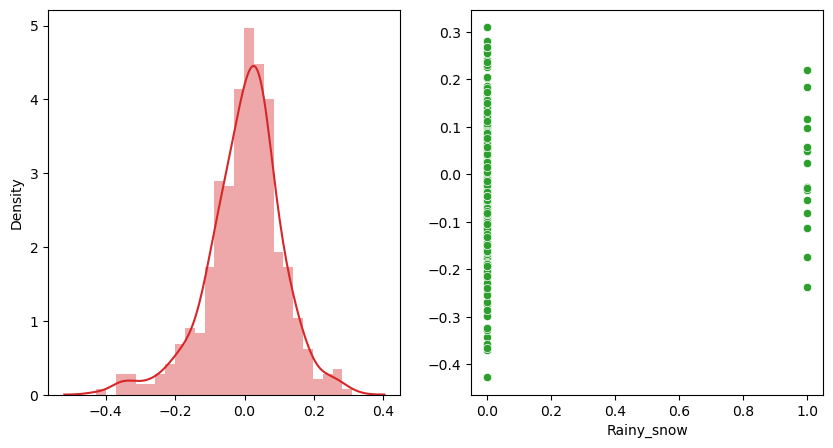

In [65]:
# residual analysis for model5

residual_analysis(X_train, y_train, Model5)


From residual analysis we can see that the errors are normally distributed and the distribution of errors with respect to each variable is random. That is the residuals show homscadasticity. 

In other words the variance in independent variables throughout the data domain doesnot affect the residuals' variance in the domain of the data

### 3.4 MODEL PREDICTION

In [66]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Wed,Thu,Fri,Sat,Sun,Mon,Clody_misty,Rainy_snow
468,1,0,0,20.295000,24.39980,50.2917,12.791439,7460,1,0,...,0,0,0,0,0,0,0,1,0,0
148,0,0,0,27.367500,30.77750,81.8750,14.333846,4788,1,0,...,0,0,0,0,0,0,0,0,0,0
302,0,0,0,13.085847,16.06645,62.3750,11.833339,3331,0,0,...,0,0,0,0,0,0,0,0,0,0
355,0,0,1,17.356653,21.30605,75.7500,3.167425,3068,0,0,...,0,1,0,0,0,1,0,0,1,0
515,1,0,1,27.880000,31.56645,49.2917,13.083693,7338,1,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
# Rescalling test data
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Wed,Thu,Fri,Sat,Sun,Mon,Clody_misty,Rainy_snow
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,1,0,...,0,0,0,0,0,0,0,1,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,1,0,...,0,0,0,0,0,0,0,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,0,0,0,0,0,0,0,0,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,0,0,...,0,1,0,0,0,1,0,0,1,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,1,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
#Creating X_test and y_test
X_test = df_test[X_train.columns]
y_test = df_test.cnt

In [78]:

# Prediction and evaluation
def model_eval(X_test, y_test, model):
    
    y_test_pred = model.predict(sm.add_constant(X_test))
        
    r2 = r2_score(y_true = y_test,
                  y_pred = y_test_pred)
    
    mse = mean_squared_error(y_true = y_test,
                             y_pred = y_test_pred )
    
    plt.scatter(x = y_test, y = y_test_pred, color = 'C1')
    plt.xlabel('y_test')
    plt.ylabel('y_test_pred')
    plt.title('y_test vs y_pred')
    plt.axis('square')
#     plt.savefig('y_test vs y_pred.png', dpi = 500)
    
    
    print('\nCoeff of determination, r2: {}'.format(r2))
    print('\nMean squared error, mse: {}'.format(mse))
    
    return r2, mse


Coeff of determination, r2: 0.7814893974670066

Mean squared error, mse: 0.011817801964781926


(0.7814893974670066, 0.011817801964781926)

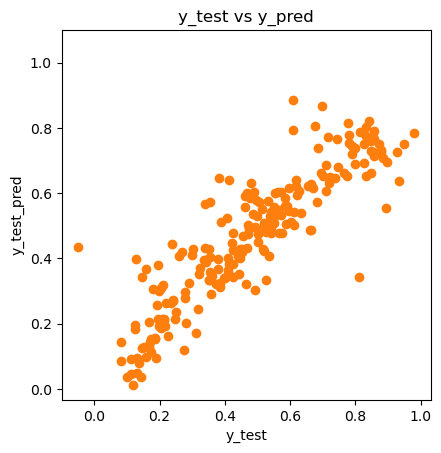

In [79]:
model_eval(X_test, y_test, Model5)

### The model seems to be working fine with test r2 score of `78.15%` which is very close to the training r2 score Also the mse is very low.